https://oj.rnd.huawei.com/problems/3565/details

### 题目描述
在一个字符矩阵中，可把横向或竖向连续相邻的字符、按顺序组成一个单词，例如下图所示的 XE、ACX、STJIIE
- 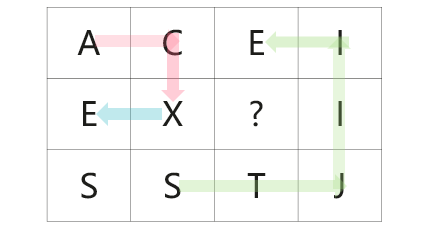

给定一个字符矩阵 charMatrix 和目标单词列表 words，请计算这个字符矩阵可以组成多少个 words 中的单词，并返回这个数量：

- 矩阵中每个格子的字符，对于同一个单词不能重复使用；在不同的单词之间可以重复使用。
- 格子字符为 ? 表示通配符，可以匹配任一字母。
### 解答要求
时间限制：1000ms, 内存限制：256MB

### 输入
首行两个整数 rows 和 cols，1 <= rows, cols <= 5
随后 rows 行，每行有 cols 个字符，表示给定的字符矩阵，字符矩阵仅由大写字母或字符?组成
最后两行输入单词数量及单词列表 words，单词仅由大写字母组成，且单词不重复，1 <= words.length <= 100，1 <= words[i].length <= 8

### 输出
一个整数，表示字符矩阵可以组成 words 中的单词数量
```
样例
输入样例 1 复制

3 4
ACEI
EX?I
SSTJ
8
ACX II STJIIE XE NXE ACA ACECTJ ACETJ
输出样例 1

6
提示样例 1
```
ACX, II, STJIIE, XE 这四个单词可由矩阵中连续相邻格子的字符组成。
利用通配符后，单词 NXE 可由矩阵中 ?XE 组成； 同理 ACECTJ 也可组成。
但 ACA 和 ACETJ 无法组成。


```
输入样例 2 复制

5 5
A?JFL
J?ASD
DG?OI
G??GB
A?OFC
7
A AA AAA AAAAAAAA ADJAS ADJAJDA LDSFL
输出样例 2

6
提示样例 2
```
只有 LDSFL 无法组成


In [7]:
"""
Copyright (c) Huawei Technologies Co., Ltd. 2019-2021. All rights reserved.
Description: 上机编程认证
Note: 缺省代码仅供参考，可自行决定使用、修改或删除
"""

from typing import List


class Solution:
    def __init__(self):
        self.temp = []
        self.result = []
        self.find = False
        self.count = 0

    def dfs(self, char_matrix: List[List[str]], word: str, start, x, y):
        if len(word) == start:
            # if self.temp not in self.result:
            self.result.append(self.temp.copy())
            self.find = True
            return
        temp_word = word[start]
        if x < 0 or x >= self.row or y < 0 or y >= self.col or self.visited[x][y] == 1 or char_matrix[x][y] not in [temp_word, '?']:
            return
        self.visited[x][y] = 1
        self.temp.append([x, y])
        self.dfs(char_matrix, word, start+1, x+1, y)
        self.dfs(char_matrix, word, start+1, x-1, y)
        self.dfs(char_matrix, word, start+1, x, y+1)
        self.dfs(char_matrix, word, start+1, x, y-1)
        self.temp.pop()
        self.visited[x][y] = 0

    def get_num_words(self, char_matrix: List[List[str]], words: List[str]) -> int:
        self.row = len(char_matrix)
        self.col = len(char_matrix[0])
        for word in words:
            for row in range(self.row):
                for col in range(self.col):
                    start = 0
                    self.visited = [[0]*self.col for _ in range(self.row)]
                    self.dfs(char_matrix, word, start, row, col)
                    self.result = []
                    if self.find:
                        break
            if self.find:
                self.count +=1
                self.find =False
        return self.count

In [8]:
# char_matrix = [['A', 'C', 'E', 'I'], ['E', 'X', '?', 'I'], ['S', 'S', 'T', 'J']]
# words = ['ACX', 'II', 'STJIIE', 'XE', 'NXE', 'ACA', 'ACECTJ', 'ACETJ']

In [9]:
char_matrix = [['E', 'O', 'Q', 'I']]
words = ['EQI', 'IQO', 'OQI']

In [10]:
sol = Solution()
sol.get_num_words(char_matrix, words)

2

In [11]:
"""
Copyright (c) Huawei Technologies Co., Ltd. 2019-2021. All rights reserved.
Description: 上机编程认证
Note: 缺省代码仅供参考，可自行决定使用、修改或删除
"""

from typing import List


class Solution:
    def __init__(self):
        self.result = None
        self.visited = None
        self.col = None
        self.row = None
        self.find = False
        self.count = 0

    def dfs(self, char_matrix: List[List[str]], word: str, start, x, y):
        if len(word) == start:
            self.find = True
            return
        temp_word = word[start]
        if x < 0 or x >= self.row or y < 0 or y >= self.col or self.visited[x][y] == 1 or char_matrix[x][y] not in [temp_word, '?']:
            return
        self.visited[x][y] = 1
        self.dfs(char_matrix, word, start+1, x+1, y)
        self.dfs(char_matrix, word, start+1, x-1, y)
        self.dfs(char_matrix, word, start+1, x, y+1)
        self.dfs(char_matrix, word, start+1, x, y-1)
        self.visited[x][y] = 0

    def get_num_words(self, char_matrix: List[List[str]], words: List[str]) -> int:
        self.row = len(char_matrix)
        self.col = len(char_matrix[0])
        for word in words:
            for row in range(self.row):
                for col in range(self.col):
                    start = 0
                    self.visited = [[0]*self.col for _ in range(self.row)]
                    self.dfs(char_matrix, word, start, row, col)
                    self.result = []
                    if self.find:
                        break
            if self.find:
                self.count +=1
                self.find =False
        return self.count

In [12]:
sol = Solution()
sol.get_num_words(char_matrix, words)

2